# End-to-end Machine Learning project

# Authors: Corneille Bobda, Huseyn Akhundov, Prabhpreet Gill

**Original Dataset Source: Moazzim Ali Bhatti. (2022). CO2 Emission by countries Year wise (1750-2022). Kaggle. https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022/data**


# CO2 Emission Dataset Description

**Attributes for CO2 Emission dataset:**

The below attributes are copied **AS IS** from the original dataset.

1. Country - Name of Country 

2. Code - Two letter short symbolic code 

3. Calling Code - Calling code of each country (numeric: from 1 to 268)

4. Year - Year of CO2 emission (numeric: from 1750 - 2020)

5. CO2 emission (Tons) - Amount of CO2 emission in Tons (numerical: from 0 to 4.17E+11)

6. Population (2022) - Population of country in 2022 (numerical: from  11,300 to 1,425,887,337)

7. Area - Area of that country in km2 (numerical: from 21 to 144,713,314)

8. % of World - How much % of World landmass, this country covered in % (numerical: 0.0 from  to 6.3)

9. Density - Density according to Area in km2 (numerical: 4 to 99)

**Missing values:** The original dataset has missing values for population, Area, % of world, and Density.



# 1- Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform environmentalist of CO2 emissions patterns and trends. Environmentalist will use the info to apply pressure and contact countries to reduce their carbon emissions in the future to help solve climate change.

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the dataset

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [11]:
# Load the dataset

url = "https://raw.githubusercontent.com/prabhpreetgill/co2emissions/main/emisisons.csv"
df = pd.read_csv(url, encoding='unicode_escape')

# Let's create a backup copy of the dataset
df_backup = df.copy()

### EDA graphs for the dataset

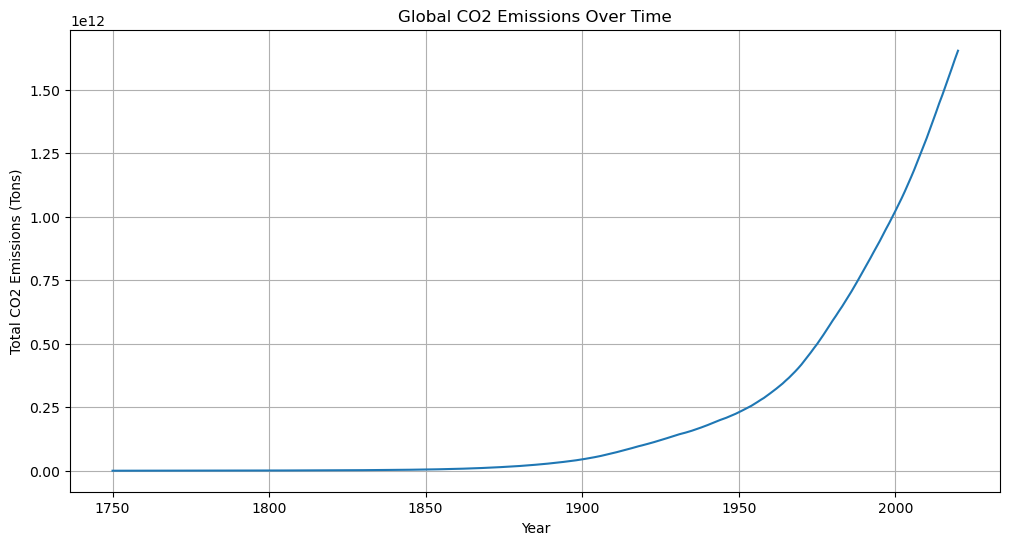

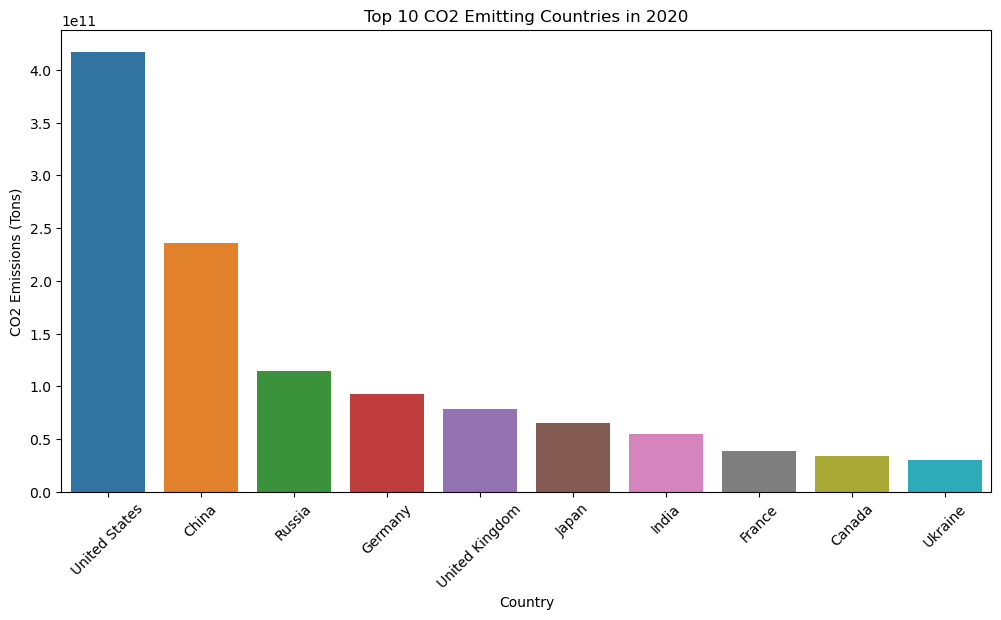

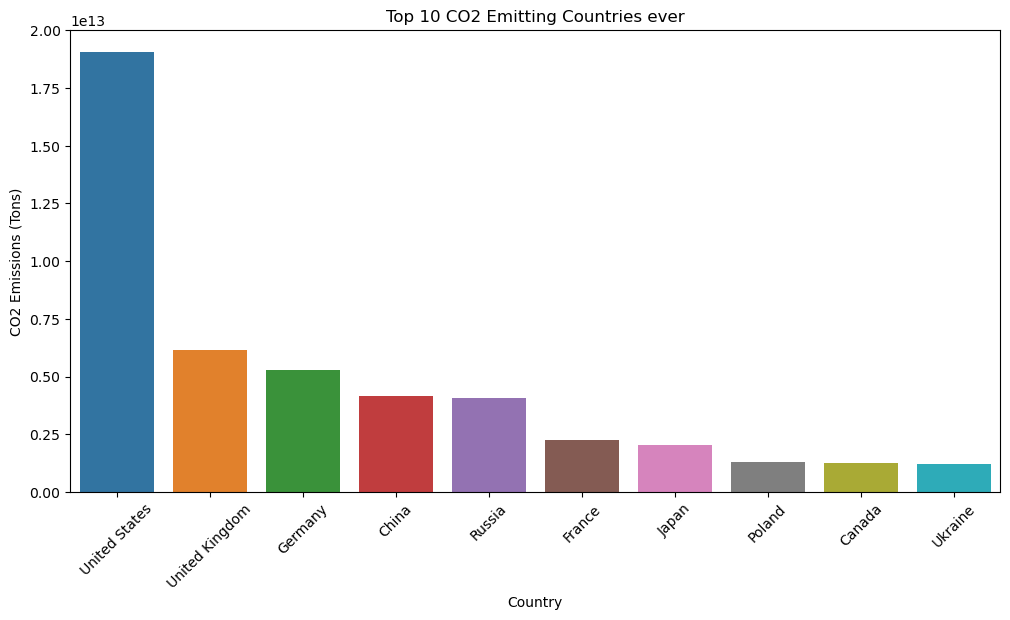

In [12]:
# Graph 1: Time Series Plot for Global CO2 Emissions
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CO2 emission (Tons)', estimator='sum', errorbar=None)
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Tons)')
plt.grid(True)
plt.show()

# Graph 2: Bar Chart for Top 10 Emitting Countries in the Latest Year
latest_year = df['Year'].max()
top_n = df[df['Year'] == latest_year].groupby('Country')['CO2 emission (Tons)'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n.index, y=top_n.values)
plt.title(f'Top 10 CO2 Emitting Countries in {latest_year}')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (Tons)')
plt.xticks(rotation=45)
plt.show()

# Graph 3: Bar Chart for Top 10 Emitting Countries of all time
# Step 1: Aggregate the CO2 emissions by country
top_n = df.groupby('Country')['CO2 emission (Tons)'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n.index, y=top_n.values)
plt.title('Top 10 CO2 Emitting Countries ever')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (Tons)')
plt.xticks(rotation=45)
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


## Data cleaning

#### Removing all rows where the CO2 emissions are 0 because they are not recorded

In [15]:
# Drop null values from the dataset
df.dropna(inplace=True)

# Check the number of non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48509 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              48509 non-null  object 
 1   Code                 48509 non-null  object 
 2   Calling Code         48509 non-null  object 
 3   Year                 48509 non-null  int64  
 4   CO2 emission (Tons)  48509 non-null  float64
 5   Population(2022)     48509 non-null  float64
 6   Area                 48509 non-null  float64
 7   % of World           48509 non-null  object 
 8   Density(km2)         48509 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.7+ MB


In [20]:
# Keeping only rows where CO2 does not equal 0
df = df[df['CO2 emission (Tons)'] != 0]

# Check the values in our cleaned up Dataframe
df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
199,Afghanistan,AF,93,1949,14656.0,41128771.0,652230.0,0.40%,63/km²
200,Afghanistan,AF,93,1950,98928.0,41128771.0,652230.0,0.40%,63/km²
201,Afghanistan,AF,93,1951,190528.0,41128771.0,652230.0,0.40%,63/km²
202,Afghanistan,AF,93,1952,282128.0,41128771.0,652230.0,0.40%,63/km²
203,Afghanistan,AF,93,1953,388384.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'CO2 emission (Tons)'}>],
       [<Axes: title={'center': 'Population(2022)'}>,
        <Axes: title={'center': 'Area'}>]], dtype=object)

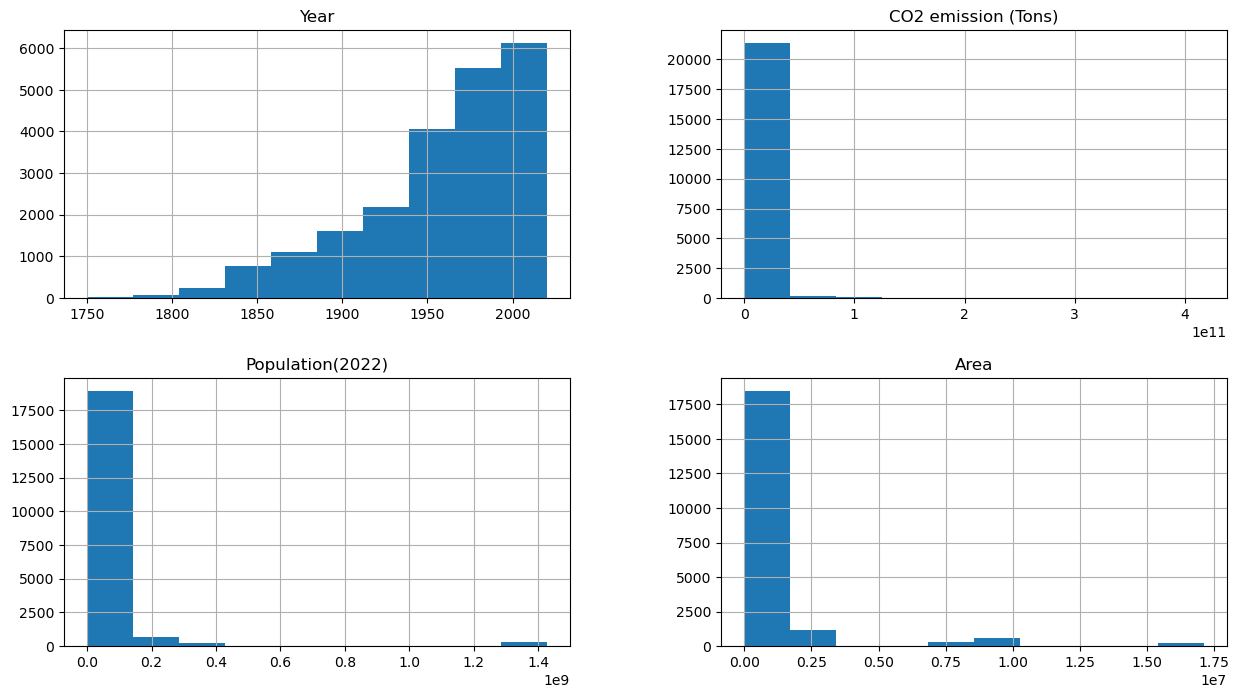

In [7]:
df.hist(figsize=(15,8))

In [21]:
# Look at correlations

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, numeric_only=True, cmap="YlGnBu")
#corr_matrix = df.corr(numeric_only=True)
#corr_matrix

ValueError: could not convert string to float: 'Afghanistan'

<Figure size 1500x800 with 0 Axes>

## Preprocessing pipeline

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#### Creating pipelines and preprocessing

In [10]:
# Create the cat and num columns
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
# Get a list of column names from the 'students' DataFrame that are not of numerical data types.

num_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("CO2 emission (Tons)")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough')

In [11]:
# Apply the column transformer to the DataFrame 'X' to perform the defined transformations.
df_prepared = preprocessing.fit_transform(df)

# Retrieve the output feature names from the column transformer.
feature_names = preprocessing.get_feature_names_out()

# Convert the transformed data (which is an array) back into a pandas DataFrame, using the new feature names.
df_prepared = pd.DataFrame(data=df_prepared, columns=feature_names)

In [12]:
df_prepared

,num__Year,num__Population(2022),num__Area,cat__Country_Afghanistan,cat__Country_Albania,cat__Country_Algeria,cat__Country_Andorra,cat__Country_Angola,cat__Country_Anguilla,cat__Country_Antarctica,...,cat__Density(km2)_84/km²,cat__Density(km2)_844/km²,cat__Density(km2)_872/km²,cat__Density(km2)_88/km²,cat__Density(km2)_9/km²,cat__Density(km2)_93/km²,cat__Density(km2)_94/km²,cat__Density(km2)_97/km²,cat__Density(km2)_99/km²,remainder__CO2 emission (Tons)
0,-1.752803,-0.000716,-0.010260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2253064.0
1,-1.695764,-0.000716,-0.010260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2743862.0
2,-1.638725,-0.000716,-0.010260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3432456.0
3,-1.581685,-0.000716,-0.010260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4139192.0
4,-1.524646,-0.000716,-0.010260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4977743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12815,1.441392,-0.174215,-0.152782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736467042.0
12816,1.498431,-0.174215,-0.152782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,746048675.0
12817,1.555471,-0.174215,-0.152782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,757903042.0
12818,1.612510,-0.174215,-0.152782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,768852126.0


## SPLITTING THE DATA INTO 80/20 TRAINING/TESTING SETS


In [31]:
from sklearn.model_selection import train_test_split

X = df_prepared.drop(["remainder__CO2 emission (Tons)"], axis=1)
y = df_prepared["remainder__CO2 emission (Tons)"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Remaining set (40%) is split equally (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

# Print the shapes of the different datasets
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(7692, 806) (7692,) (2564, 806) (2564,) (2564, 806) (2564,)


In [32]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [33]:
lr_model.score(X_validation, y_validation)

0.8309290317573248

In [35]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

7.628656043036287e+19

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-6.98666354e+19, -6.99872019e+19, -6.08625641e+19, -8.65242325e+19,
       -7.89851925e+19])

In [37]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 7.324516527627755e+19


In [38]:
from sklearn.linear_model import Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

c:\Users\corne\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.492e+23, tolerance: 3.749e+20
  model = cd_fast.enet_coordinate_descent(


In [119]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 3.453201756436681e+19
Lasso Regression MSE: 3.4796965725596123e+19


In [120]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Linear Regression MSE: 3.4984210889590817e+19
Cross-Validation Mean Score: 4.876393124819507e+19
Ridge Regression MSE: 3.453201756436681e+19
Lasso Regression MSE: 3.4796965725596123e+19


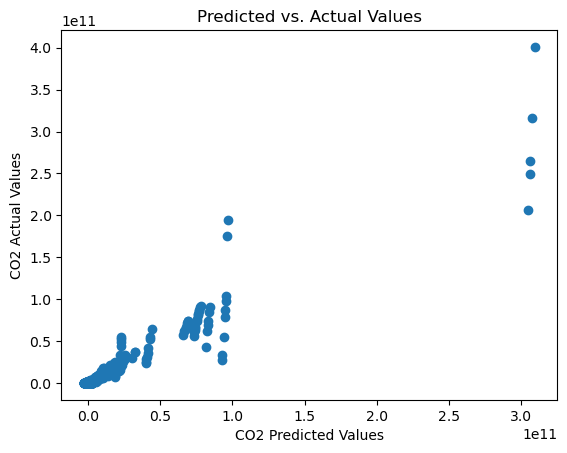

In [121]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(Ridge_y_predict, y_test)  # y is your actual target values
plt.xlabel("CO2 Predicted Values")
plt.ylabel("CO2 Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()